Задание 4. Задача максимизации прибыли производителя

Производственная функция (в ден. выражении) имеет вид Q(x, y) = Ax<sup>a1</sup> y<sup>
a2</sup>
, где x, y
– количества единиц первого и второго ресурсов.<br>Стоимость единицы первого ресурса
– w1, второго – w2 (ден.ед.).<br>
1. Найдите максимальную прибыль и оптимальный план.

In [1]:
import numpy as np
from scipy.optimize import minimize, LinearConstraint, Bounds
import sympy as sym

In [20]:
A, a1, a2, w1, w2, I = [float(x) if '/' not in x else float(x.split('/')[0])/float(x.split('/')[1]) for x in input('Введите числа A, a1, a2, w1, w2, I через запятую с пробелом (дроби можно вводить как в обыкновенном, так и в десятичном виде):\n').split(', ')]

Введите числа A, a1, a2, w1, w2, I через запятую с пробелом (дроби можно вводить как в обыкновенном, так и в десятичном виде):
30, 1/2, 1/3, 5, 10, 600


In [21]:
xs, ys = sym.symbols('x y')
Q = A * xs ** a1 * ys ** a2 - w1 * xs - w2 * ys

In [22]:
Q

30.0*x**0.5*y**0.333333333333333 - 5.0*x - 10.0*y

In [23]:
def con(xy):
    x, y = xy
    return f'w1*x + w2*y = {(w1*x + w2*y).round(3)} <= I = {I}'

In [24]:
def f(xy):
    x, y = xy
    return -(A * x ** a1 * y ** a2 - w1 * x - w2 * y)

In [25]:
def gr(xy):
    x, y = xy
    
    der = np.zeros_like(xy)
    der[0] = -eval(str(Q.diff(xs)))
    der[1] = -eval(str(Q.diff(ys)))
    
    return der

In [26]:
print('dQ/dx:')
display(Q.diff(xs))
print('dQ/dy:')
display(Q.diff(ys))

dQ/dx:


15.0*y**0.333333333333333/x**0.5 - 5.0

dQ/dy:


10.0*x**0.5/y**0.666666666666667 - 10.0

In [27]:
x0 = np.array([1.0, 1.0])
res_without_constr = minimize(f, x0, jac=gr, options={'disp': True})

Optimization terminated successfully.
         Current function value: -135.000000
         Iterations: 17
         Function evaluations: 18
         Gradient evaluations: 18


In [28]:
print(f'Оптимальные значения: x = {res_without_constr.x[0]}, y = {res_without_constr.x[1]}')
print('Max значение функции:',-res_without_constr.fun)

Оптимальные значения: x = 81.00013984566034, y = 27.0000351397207
Max значение функции: 134.99999999984902


2. В силу бюджетных ограничений на ресурсы может быть потрачено не более I
(ден.ед.). Найдите максимальную прибыль при наличии бюджетных ограничений и оптимальное для производителя сочетание (x, y) количеств используемых ресурсов.

In [29]:
x_min = 0
y_min = 0
x_max = np.inf
y_max = np.inf

linear_constraint = LinearConstraint ([w1, w2], 0, I)
bounds = Bounds([x_min, y_min], [x_max, y_max])
x0 = np.array([1.0, 1.0])

res = minimize(f, x0, jac=gr, constraints=linear_constraint, bounds=bounds, options={'disp': True})

u = res.x[0]
v = res.x[1]

print(res.x)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -134.27360483322968
            Iterations: 9
            Function evaluations: 9
            Gradient evaluations: 9
[71.99882245 24.00058878]


In [30]:
print(f'Оптимальные значения: x = {u}, y = {v}')
print('Max значение функции:',-res.fun)
print(con(res.x))

Оптимальные значения: x = 71.99882244980648, y = 24.00058877509676
Max значение функции: 134.27360483322968
w1*x + w2*y = 600.0 <= I = 600.0


3. Постройте пространственную модель функции прибыли. Постройте карту изоквант.

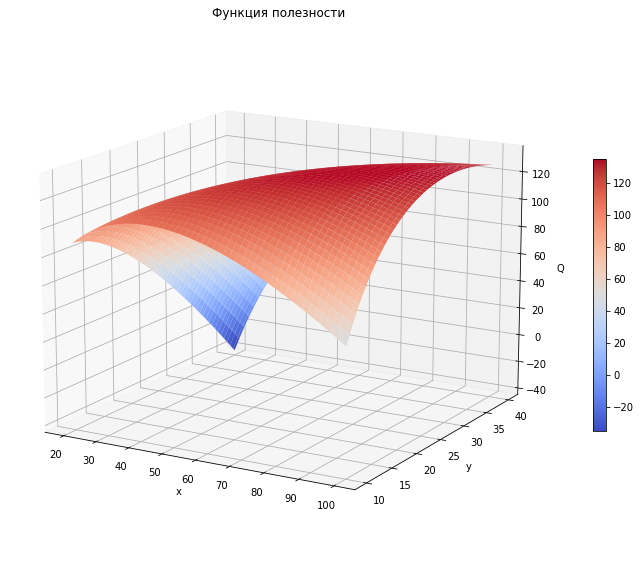

In [31]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# Настраиваем 3D график
fig, ax = plt.subplots(figsize=(15,10), subplot_kw={"projection": "3d"})

# Задаем угол обзора
ax.view_init(15, -60)

# Создаем данные для графика

X = np.linspace(20, 100, 200)
Y = np.linspace(10, 40, 100)
X, Y = np.meshgrid(X, Y)
Z = -f(np.array([X,Y]))

# Рисуем поверхность
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.5)
ax.set_title('Функция полезности')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Q')
plt.show()

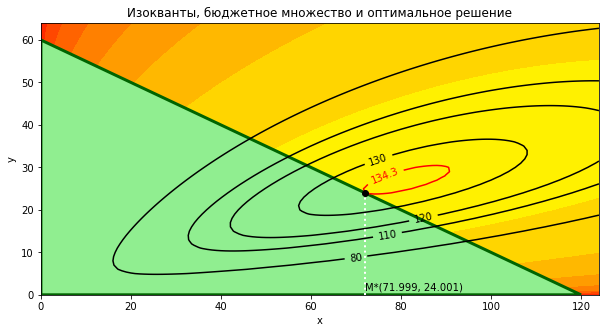

In [32]:
fig, ax = plt.subplots(figsize=(10,5))

X = np.arange(0, 125, 1)
Y = np.arange(0, 65, 1)
X, Y = np.meshgrid(X, Y)
Z = -f(np.array([X,Y]))

ax.contourf(X, Y, Z, cmap='autumn')

adm = plt.Polygon([(x_min,y_min),(x_min, I/w2-w1*x_min/w2),(I/w1-w2*y_min/w1, y_min)], facecolor='lightgreen', edgecolor='darkgreen', alpha = 1, linewidth=3)
ax.add_patch(adm)

ax.set_title('Изокванты, бюджетное множество и оптимальное решение')
ax.set_xlabel('x')
ax.set_ylabel('y')

cs_m = ax.contour(X, Y, Z, levels=[-res.fun], colors='red')
cs = ax.contour(X, Y, Z, levels=[80,110,120,130], colors='black')

plt.vlines(x=u, ymin=0, ymax=v, colors='white', ls=':', lw=2)
ax.plot(u, v, 'ko')
ax.text(res.x[0], 1, f'M*({u.round(3)}, {v.round(3)})')

ax.clabel(cs)
ax.clabel(cs_m)

plt.show()

4. Найдите уравнение изокванты, на которой достигается максимум прибыли при наличии ограничений на издержки. Найдите уравнение изокосты, которая соответствует ограничениям на издержки.

In [33]:
F = sym.Eq(Q, -res.fun)

In [34]:
print('Уравнение изокванты на которой достигается максимум прибыли при наличии ограничений на издержки:')
display(F)

Уравнение изокванты на которой достигается максимум прибыли при наличии ограничений на издержки:


Eq(30.0*x**0.5*y**0.333333333333333 - 5.0*x - 10.0*y, 134.27360483323)

In [35]:
print('Уравнение изокосты, которая соответствует ограничениям на издержки:')
display(sym.Eq(w1*xs + w2*ys, I))

Уравнение изокосты, которая соответствует ограничениям на издержки:


Eq(5.0*x + 10.0*y, 600.0)